## Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
import os

In [18]:
BASE_PATH = './data/'
datasetpath = f'{BASE_PATH}/movie.csv'
os.listdir(BASE_PATH)

['movie.csv']

## Loading Dataset

In [4]:
df = pd.read_csv(datasetpath, encoding='utf-8')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [29]:
df.loc[0, 'text']

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [5]:
df.describe()

,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [65]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.columns

Index(['text', 'label'], dtype='object')

Min: 4
Max: 2470
Mean: 231.328975
Standard Deviation: 171.1783333281242


<AxesSubplot:>

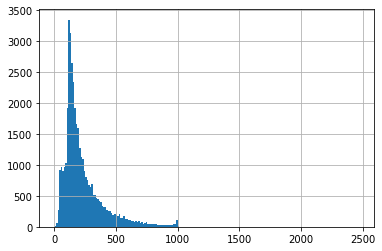

In [74]:
df['word_count'] = df['text'].apply(lambda x: len(x.split(' ')))

# print word count statistics
print('Min:', df['word_count'].min())
print('Max:', df['word_count'].max())
print('Mean:', df['word_count'].mean())
print('Standard Deviation:', df['word_count'].std())

#show the distribution of word count
df['word_count'].hist(bins=200)

In [10]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [11]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
train_x, test_x, y_train, y_test = train_test_split(df.text, df.label, test_size=0.25,random_state=123)

### Tokenzation (method 1)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>") # any unknown words will be replaced by oov_token

In [79]:
vocab_size = 40000 # unique words to train the network
max_length = int(df['word_count'].mean()) # the length of each review. If originally the comment is longer than "max_length" words, it will be truncated
trunc_type = 'post' # the review will be truncated at the end when a review is bigger than "max_length" or padded when a review is smaller than "max_length"
padding_type = 'post' # padding will be applied at the end, not in the beginning
oov_tok = '<OOV>' # any unknown words will be replaced by oov_token

In [80]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index

In [81]:
word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'have': 26,
 'be': 27,
 'one': 28,
 'he': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'an': 33,
 'they': 34,
 'from': 35,
 'so': 36,
 'who': 37,
 'like': 38,
 'or': 39,
 'just': 40,
 'her': 41,
 'about': 42,
 'out': 43,
 'if': 44,
 "it's": 45,
 'has': 46,
 'there': 47,
 'some': 48,
 'what': 49,
 'good': 50,
 'more': 51,
 'when': 52,
 'very': 53,
 'up': 54,
 'no': 55,
 'time': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'she': 60,
 'which': 61,
 'only': 62,
 'really': 63,
 'see': 64,
 'story': 65,
 'their': 66,
 'can': 67,
 'had': 68,
 'me': 69,
 'well': 70,
 'were': 71,
 'than': 72,
 'much': 73,
 'we': 74,
 'bad': 75,
 'get': 76,
 'been': 77,
 'will': 78,
 'do': 79,
 'great': 80,
 'other': 81,
 'into': 82,
 '

In [82]:
seq = tokenizer.texts_to_sequences(train_x)
train_x_tokenized_padded = pad_sequences(seq, maxlen=max_length, truncating=trunc_type)
seq = tokenizer.texts_to_sequences(test_x)
test_x_tokenized_padded = pad_sequences(seq, maxlen=max_length)

In [83]:
train_x_tokenized_padded

array([[    0,     0,     0, ...,    33, 14403,   201],
       [  583,    64,    83, ...,    24,    47,     3],
       [    0,     0,     0, ..., 37892,    67, 23937],
       ...,
       [    0,     0,     0, ...,    18,     8,     8],
       [    0,     0,     0, ...,    46,   124,   107],
       [    0,     0,     0, ...,   346,     8,     8]])

### Vectorization (method 2)

In [13]:
#TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1, stop_words = 'english')

tfv.fit(list(train_x) + list(test_x))
train_x_tfv =  tfv.transform(train_x) 
test_x_tfv = tfv.transform(test_x)

In [14]:
train_x.shape

(30000,)

In [15]:
y_train.shape

(30000,)

In [16]:
test_x.shape, y_test.shape

((10000,), (10000,))

In [26]:
dataset = tf.data.experimental.make_csv_dataset(datasetpath, batch_size=32,
                                                select_columns=['\ufefftext', 'label'],
                                                label_name='label')

<TakeDataset element_spec=(OrderedDict([('\ufefftext', TensorSpec(shape=(32,), dtype=tf.string, name=None))]), TensorSpec(shape=(32,), dtype=tf.int32, name=None))>


In [36]:
for features, labels in dataset.take(1): # first batch
    print(labels)
    for key, value in features.items():
        print("{:20s}: {}".format(key,value.numpy()))

tf.Tensor([1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1], shape=(32,), dtype=int32)
﻿text               : [b"This movie was recommended to me by the same person that blessed me with a copy of The Chronicles of Narnia. Shadowlands is one of the most amazing screenplays ever written. It is well executed, acted and directed. The cinematography is a bit dark for my taste but I'm sure it was intended to be so. The screenplay is like poetry in portions of the movie, through out the movie I found myself taking pause to reflect on the comments just made on screen. This is a wonderful piece of cinema and I can only hope that more people will run across it and add reviews. Fair warning though this was a 6 tissue movie for me. Very touching. Very Heartfelt performances."
 b'Astounding that something like this could find its way to be viewed by the public. I knew it was by Uwe Boll, & I found it in the bargain bin at a store for $2 (still pretty steep, considering) but morbid cu

In [24]:
dataset = dataset.map(lambda x, y: (tf.concat([tf.expand_dims(x['\ufefftext'], axis=-1)], axis=-1), y))

TypeError: in user code:

    File "C:\Users\renua\AppData\Local\Temp\ipykernel_17272\4275188195.py", line 1, in None  *
        lambda x, y: (tf.concat([tf.expand_dims(x['\ufefftext'], axis=-1)], axis=-1), y)

    TypeError: Only integers, slices (`:`), ellipsis (`...`), tf.newaxis (`None`) and scalar tf.int32/tf.int64 tensors are valid indices, got '\ufefftext'


## Building the model

In [84]:
model = tf.keras.Sequential([
    layers.Input(shape=(max_length, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [85]:
model.compile('adam', tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [86]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                7424      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14,817
Trainable params: 14,817
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [87]:
epochs = 15
history = model.fit(train_x_tokenized_padded, y_train, epochs=epochs, validation_data=(test_x_tokenized_padded, y_test))

Epoch 1/15
938/938 [==============================] - 3s 2ms/step - loss: 26.9328 - accuracy: 0.5050 - val_loss: 2.8776 - val_accuracy: 0.5064
Epoch 2/15
938/938 [==============================] - 2s 2ms/step - loss: 2.4968 - accuracy: 0.5086 - val_loss: 1.6667 - val_accuracy: 0.5039
Epoch 3/15
938/938 [==============================] - 2s 2ms/step - loss: 1.2522 - accuracy: 0.5099 - val_loss: 0.9861 - val_accuracy: 0.4940
Epoch 4/15
938/938 [==============================] - 2s 2ms/step - loss: 0.9897 - accuracy: 0.5045 - val_loss: 0.8817 - val_accuracy: 0.4993
Epoch 5/15
938/938 [==============================] - 2s 2ms/step - loss: 0.8299 - accuracy: 0.5136 - val_loss: 0.7539 - val_accuracy: 0.5140
Epoch 6/15
938/938 [==============================] - 2s 2ms/step - loss: 0.7550 - accuracy: 0.5089 - val_loss: 0.7787 - val_accuracy: 0.4973
Epoch 7/15
938/938 [==============================] - 2s 2ms/step - loss: 0.7296 - accuracy: 0.5088 - val_loss: 0.7215 - val_accuracy: 0.5070
Epoch

### Model Performance

<Figure size 432x288 with 0 Axes>

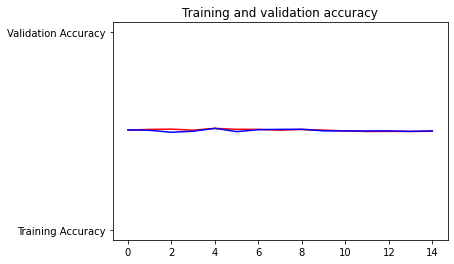

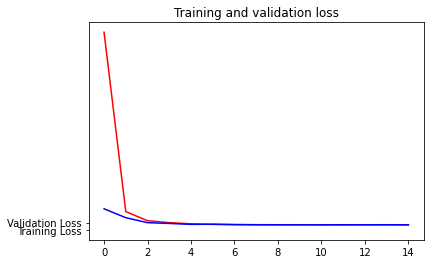

<Figure size 432x288 with 0 Axes>

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

## Histograms